In [9]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer


In [11]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [12]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.00,86,5800,27,33,10295.0
21,22,1,dodge rampage,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0
175,176,-1,toyota corona,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.70,92,4200,27,32,9988.0
146,147,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,...,108,2bbl,3.62,2.64,9.00,82,4800,28,32,7463.0
92,93,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.40,69,5200,31,37,6849.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
df.shape

(205, 26)

In [16]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
sum(df.duplicated(subset = 'car_ID')) == 0 

True

In [18]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [20]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.lower()

In [21]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [22]:

df['brand'] = df['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
df['brand'] = df['brand'].replace(['maxda'], 'mazda')
df['brand'] = df['brand'].replace(['porcshce'], 'porsche')
df['brand'] = df['brand'].replace(['toyouta'], 'toyota')

In [23]:
df.brand.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

C:\Users\LCPC-129\AppData\Local\Temp\ipykernel_8708\2988264184.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)


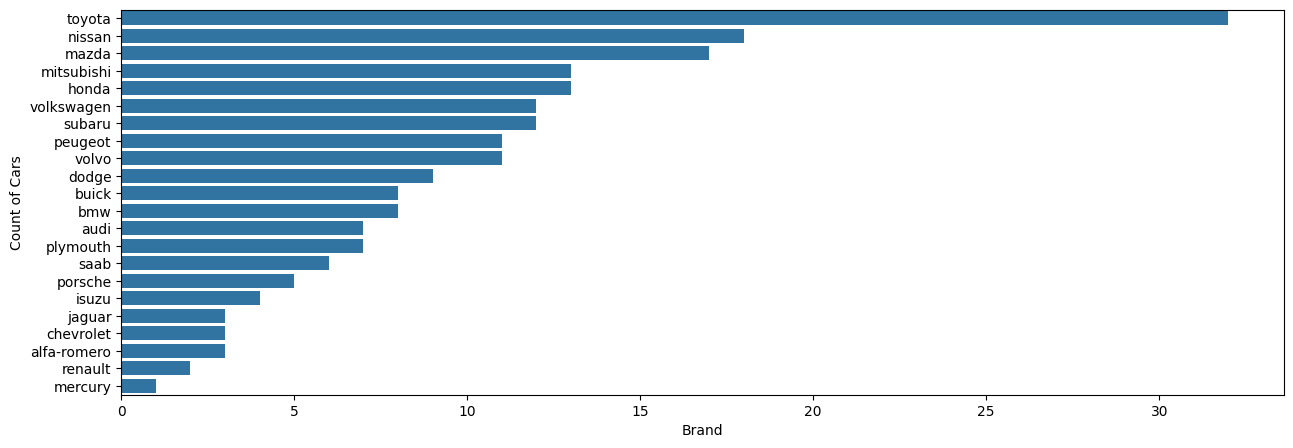

<Figure size 640x480 with 0 Axes>

In [24]:

fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()


In [25]:

df.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [29]:
df_comp_avg_price = df[['brand', 'price']].groupby('brand', as_index=False).mean().rename(columns={'price': 'average_price'})

In [30]:

df = df.merge(df_comp_avg_price, on = 'brand')


In [32]:
df_comp_avg_price = df[['brand', 'price']].groupby('brand', as_index=False).mean()
print(df_comp_avg_price.describe())

              price
count     22.000000
mean   15079.877372
std     8738.804704
min     6007.000000
25%     8997.317308
50%    10534.274510
75%    17520.125036
max    34600.000000


In [34]:
df_comp_avg_price = df[['brand', 'price']].groupby('brand', as_index=False).mean()

In [35]:
df_comp_avg_price = df[['brand', 'price']].groupby('brand', as_index=False).mean()

In [36]:
print(df_comp_avg_price['price'].describe())

count       22.000000
mean     15079.877372
std       8738.804704
min       6007.000000
25%       8997.317308
50%      10534.274510
75%      17520.125036
max      34600.000000
Name: price, dtype: float64


In [37]:
df_comp_avg_price = df[['brand', 'price']].groupby('brand', as_index=False).mean()

In [38]:
print(df_comp_avg_price['price'].describe())


count       22.000000
mean     15079.877372
std       8738.804704
min       6007.000000
25%       8997.317308
50%      10534.274510
75%      17520.125036
max      34600.000000
Name: price, dtype: float64


In [39]:
df_comp_avg_price = df[['brand', 'price']].groupby('brand', as_index=False).mean().rename(columns={'price': 'brand_avg_price'})

In [40]:
print(df_comp_avg_price['brand_avg_price'].describe())

count       22.000000
mean     15079.877372
std       8738.804704
min       6007.000000
25%       8997.317308
50%      10534.274510
75%      17520.125036
max      34600.000000
Name: brand_avg_price, dtype: float64


In [43]:
df_comp_avg_price = df[['brand', 'price']].groupby('brand', as_index=False).mean()
df_comp_avg_price.rename(columns={'price': 'brand_avg_price'}, inplace=True)

In [44]:
df['brand_avg_price'] = df.groupby('brand')['price'].transform('mean')

In [45]:
# Then you can categorize based on 'brand_avg_price'
df['brand_category'] = df['brand_avg_price'].apply(lambda x: "Budget" if x < 10000
                                                  else ("Mid_Range" if 10000 <= x < 20000
                                                  else "Luxury"))

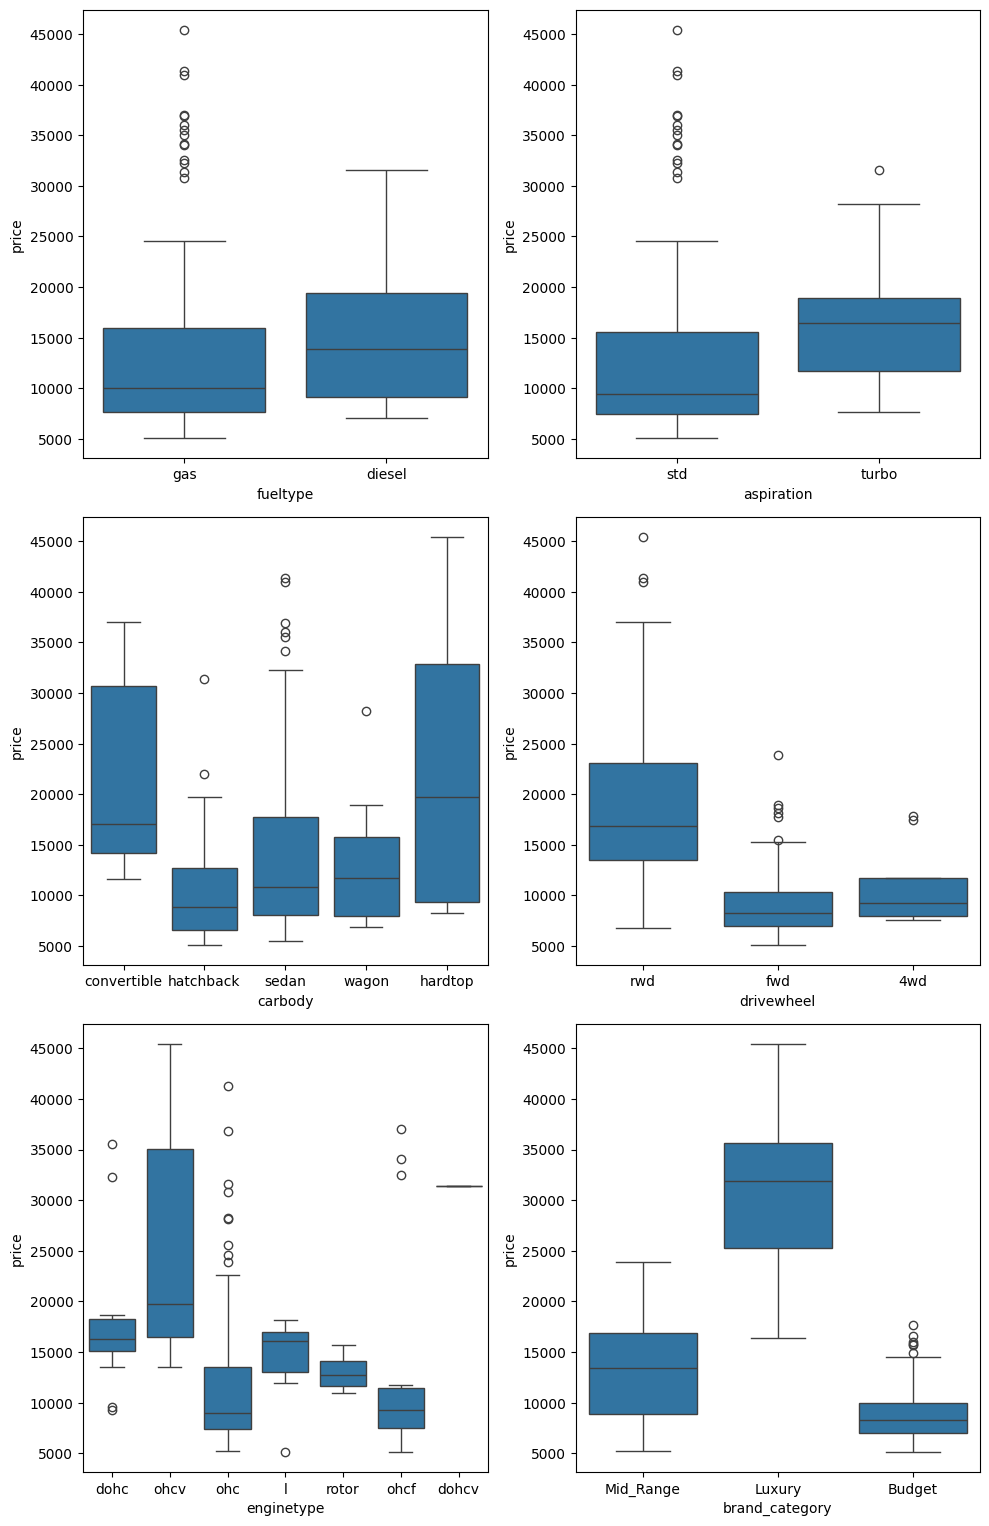

In [46]:

plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = df)
plt.tight_layout()
plt.show()

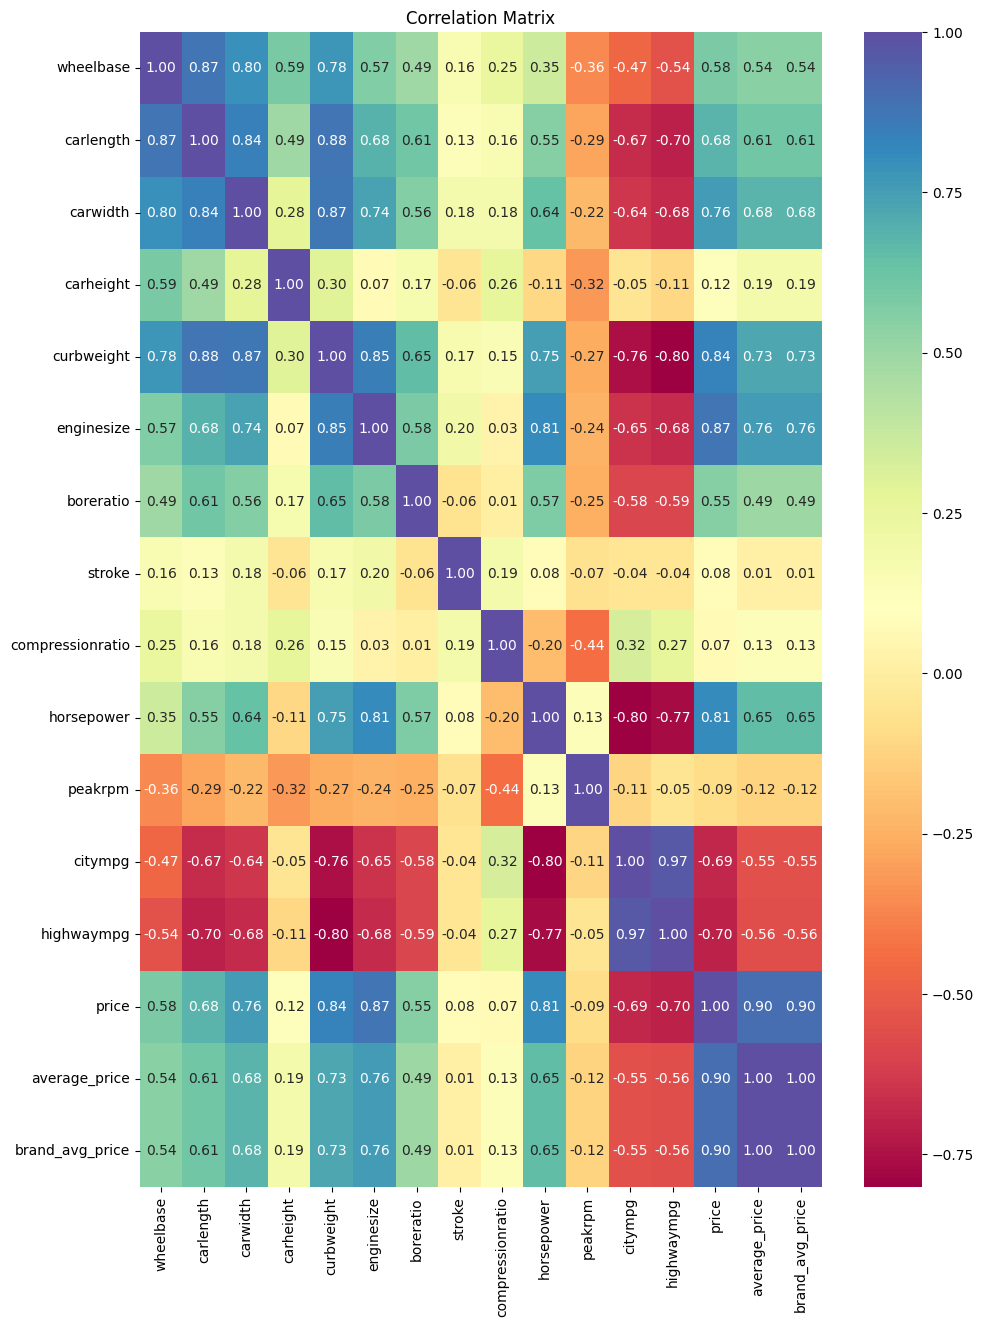

In [47]:
 corr_matrix = df.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending=False)
plt.figure(figsize=(11,15))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

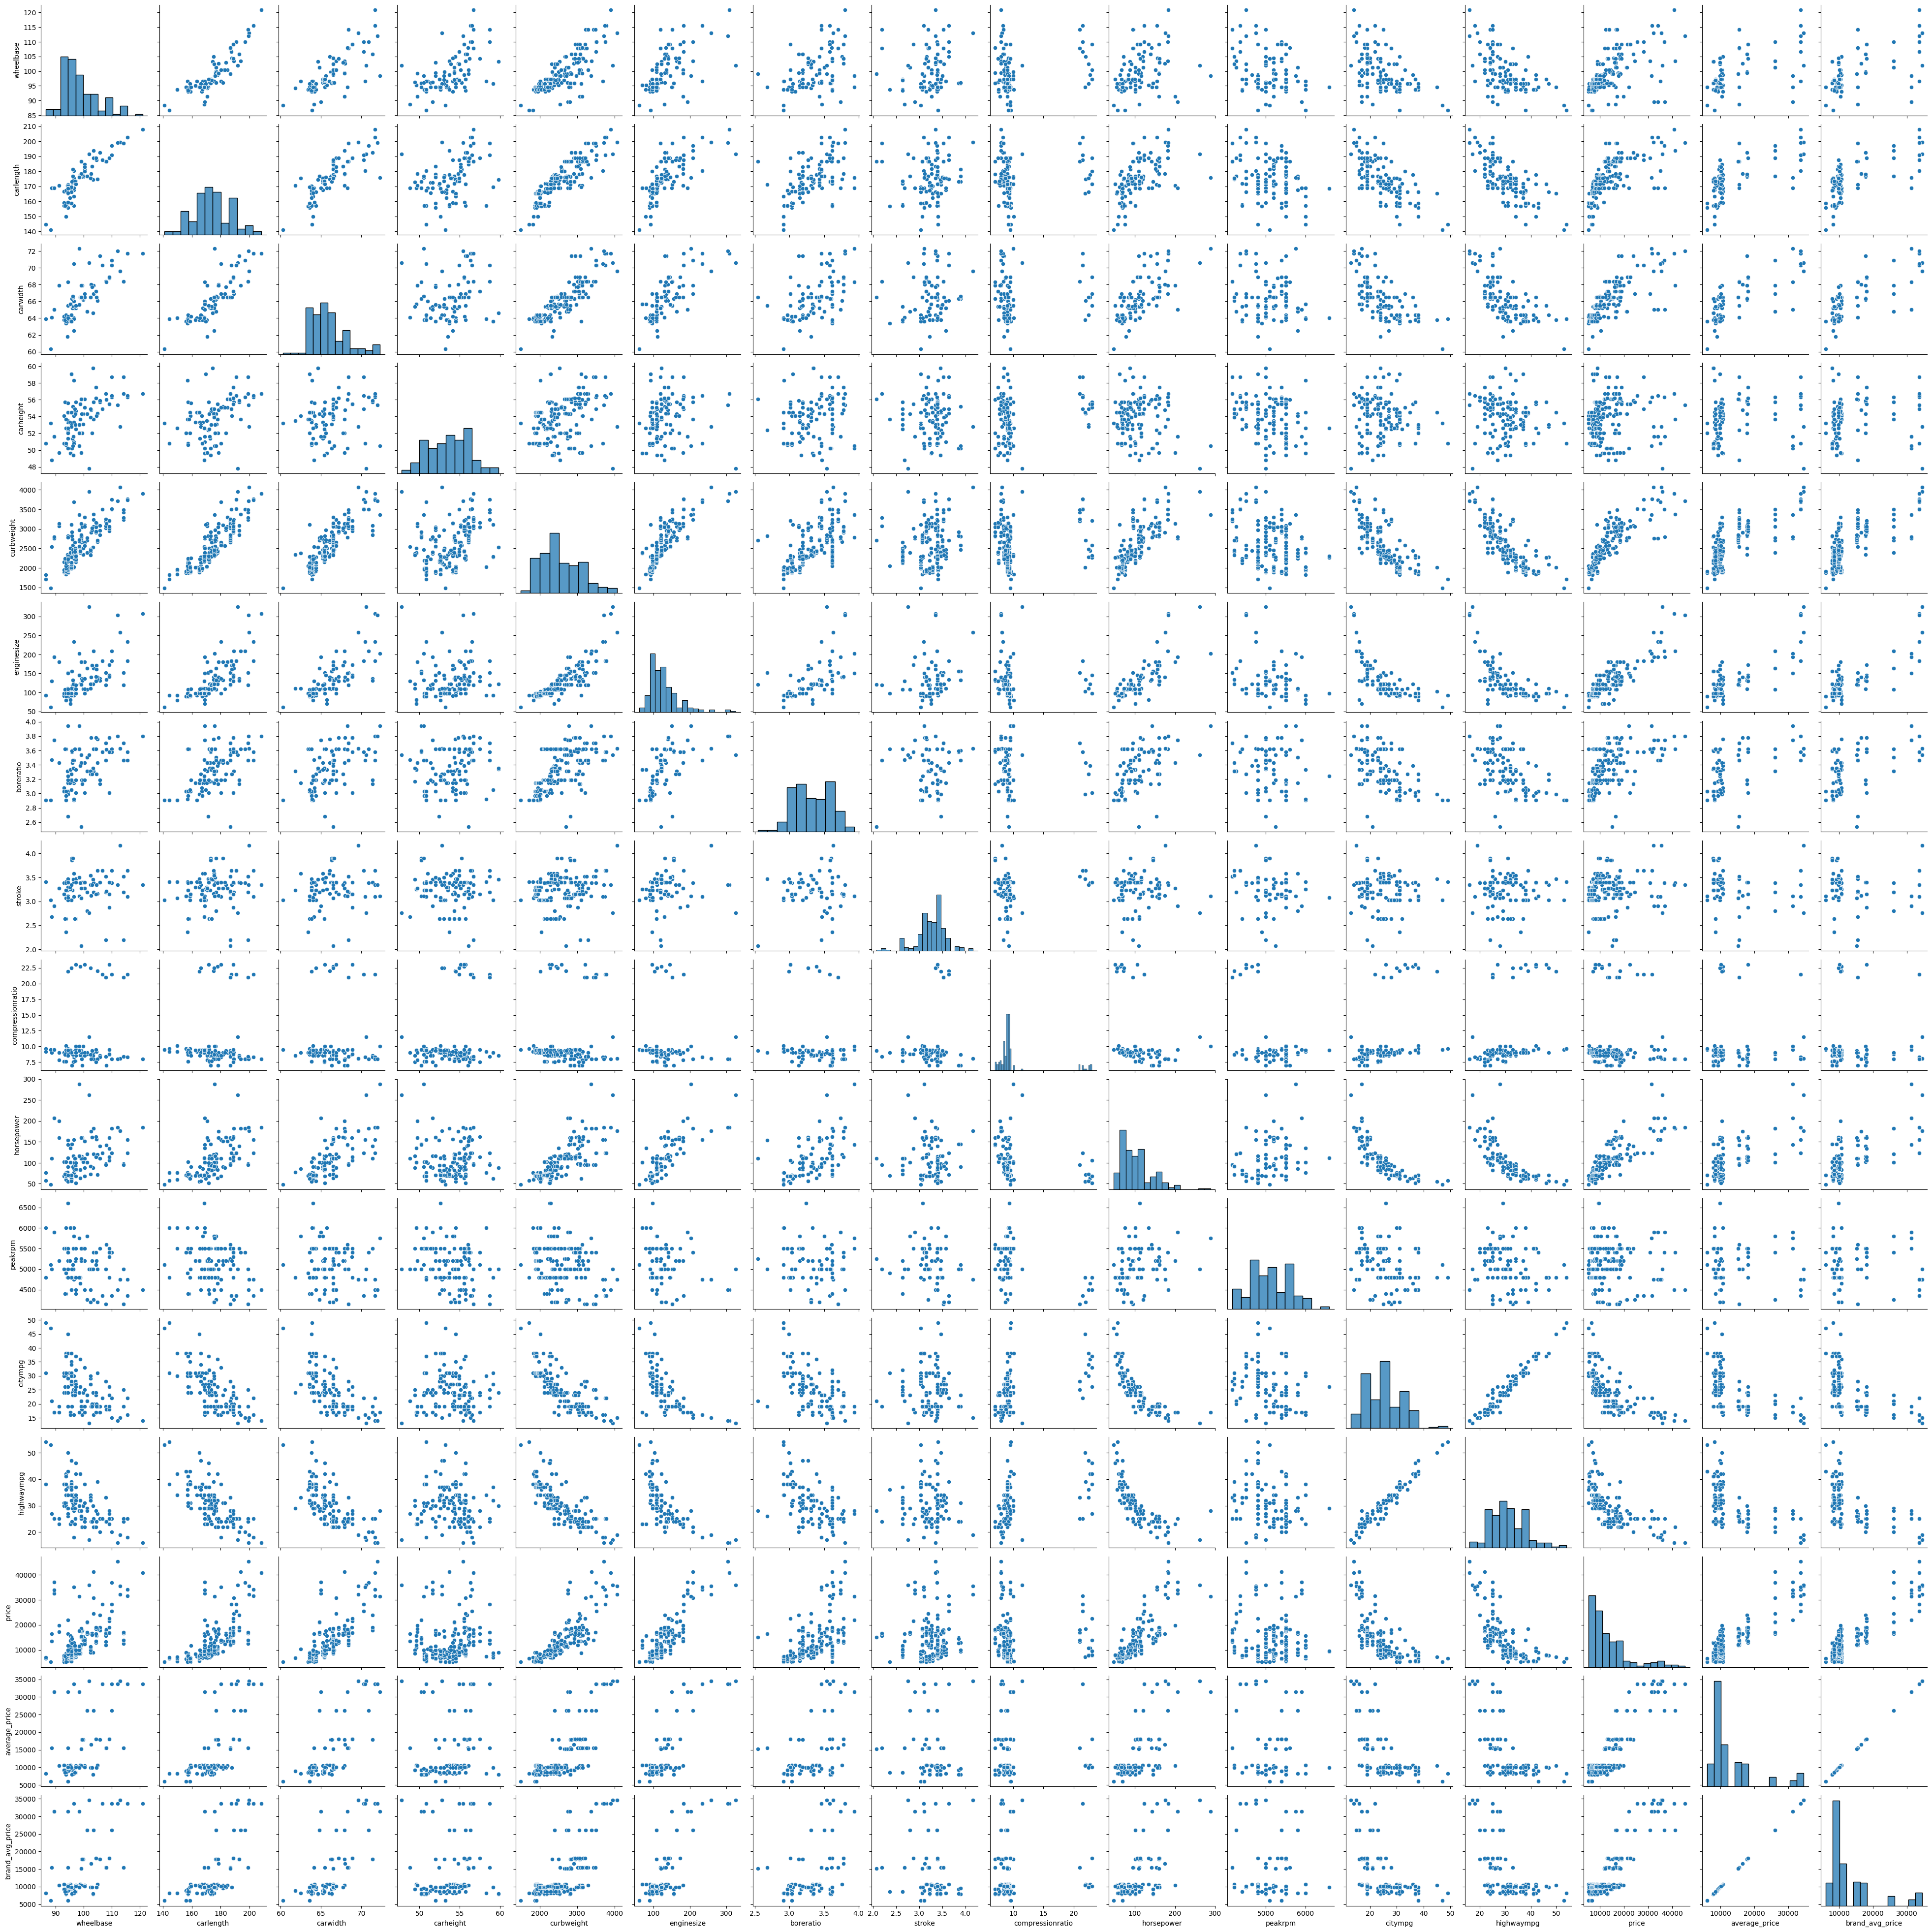

In [49]:
sns.pairplot(df)
plt.show()


In [52]:
x=df.drop('price', axis=1)
y=df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import OneHotEncoder




In [68]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [75]:
# Selecting features and target variable
features = [ 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'brand_category']
X = df[features]
y = df['price']
# Encoding categorical variables if needed
X = pd.get_dummies(X)
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Making predictions on the testing set
y_pred = model.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 16487808.754533878
R-squared Score: 0.7911455665569922
